In [1]:
import tensorflow

In [2]:
import keras


In [3]:
import numpy as np 
import pandas as pd

In [4]:
from keras.datasets import mnist

In [5]:
from keras.models import Sequential

In [6]:
from keras.layers import Dense

In [7]:
from keras.layers import Flatten

In [8]:
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

In [9]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 87s 8us/step


In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))

In [13]:
y_train.shape

(60000,)

In [14]:
num_count = np.zeros(10)

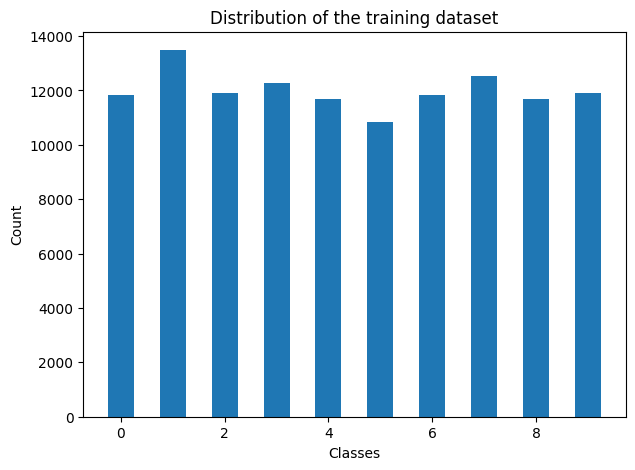

In [16]:
for i in y_train:
    num_count[i] += 1

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
y_label = list(set(y_train))
plt.bar(y_label,num_count,width=0.5)
plt.title("Distribution of the training dataset")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


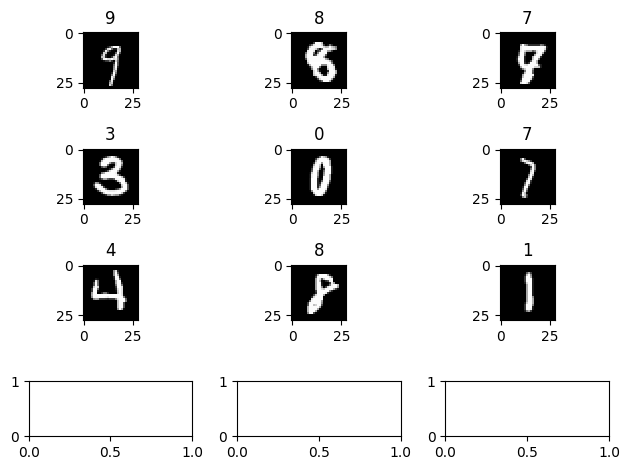

In [17]:
fig,ax = plt.subplots(4,3)
for i in range(3):
    for j in range(3):
        rand_num = np.random.randint(0,60000)
        ax[i,j].imshow(X_train[rand_num],cmap='gray')
        ax[i,j].set_title(y_train[rand_num])
        plt.tight_layout()

In [18]:
X_test = X_test.reshape((X_test.shape[0],28,28,1))
input_shape = (28,28,1)
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
X_train = X_train/255
X_test = X_test/255

Creating the Model

In [19]:
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
model.fit(X_train,y_train,epochs=10,verbose=1,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/10


469/469 [==============================] - 28s 59ms/step - loss: 0.1901 - accuracy: 0.9423 - val_loss: 0.0499 - val_accuracy: 0.9834
Epoch 2/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0632 - accuracy: 0.9808 - val_loss: 0.0327 - val_accuracy: 0.9891
Epoch 3/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0314 - val_accuracy: 0.9890
Epoch 4/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0272 - val_accuracy: 0.9913
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0266 - val_accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0263 - val_accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0263 - val_accurac

In [23]:
model.save("Digit_Recog_model")

INFO:tensorflow:Assets written to: Digit_Recog_model\assets


INFO:tensorflow:Assets written to: Digit_Recog_model\assets


In [24]:
score = model.evaluate(X_test,y_test,verbose = 1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0291 - accuracy: 0.9919


In [25]:
print("Test Loss = {}".format(score[0]))
print("Test Accuracy = {}".format(score[1]))

Test Loss = 0.029056591913104057
Test Accuracy = 0.9919000267982483


In [26]:
rand_arr = np.random.randint(0,10000,9)
pred_values = np.zeros(9)
for i in range(9):
    to_pred = X_test[rand_arr[i]]
    to_pred = to_pred.reshape((1,28,28,1))
    Y = model.predict(to_pred,verbose=0)
    pred_values[i] = np.argmax(Y)

Predicting Values

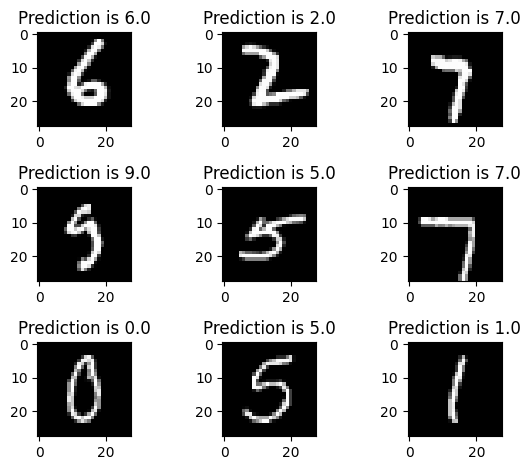

In [27]:
rand_arr = rand_arr.reshape((3,3))
pred_values = pred_values.reshape(3,3)
fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(X_test[rand_arr[i][j]],cmap='gray')
        ax[i,j].set_title("Prediction is {}".format(pred_values[i][j]))
        plt.tight_layout()